In [1]:
%matplotlib inline
!pip install --upgrade pip
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
import numpy as np
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
! pip install -q scikit-plot
import scikitplot as skplt
import pickle

import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score


df = pd.read_csv('aggregated_features.csv')


df.head()

,project_id,incubation_length,active_devs,num_commits,num_committers,num_files,num_emails,num_senders,num_respondents,skew_c,...,c_mean_degree,c_long_tail,c_triangles,e_nodes,e_edges,e_c_coef,e_mean_degree,e_long_tail,e_triangles,e_bidirected_edges
0,100,25.700000,30,3568,4,519,420,26,25,0.631190,...,3.000,0,4.0,26,49,0.401665,3.769231,2,29.0,77
1,101,43.166667,49,2339,5,430,1547,47,46,0.163755,...,3.600,3,7.0,48,118,0.554668,4.916667,4,77.0,187
2,102,24.766667,69,1946,8,265,4894,63,66,-0.350719,...,6.500,7,45.0,68,262,0.472856,7.705882,19,539.0,432
3,103,53.233333,64,6451,8,2084,1710,56,57,0.639066,...,4.000,6,14.0,58,153,0.444966,5.275862,7,131.0,232
4,104,21.000000,96,6467,16,888,1819,86,81,-0.732883,...,10.875,14,244.0,87,227,0.449866,5.218391,5,164.0,343


**Comparing the features of the dataset**




In [3]:
#features mentioned in the paper
list_paper = [
    'active_devs',
    'num_emails',
    'num_commits',
    'num_files',
    'c_interruption',
    'e_interruption',
    'top_e_fract',
    'top_c_fract',
    'c_nodes',
    'c_edges',
    'c_c_coef',
    'c_mean_degree',
    'c_long_tail',
    'e_nodes',
    'e_edges',
    'e_c_coef',
    'e_mean_degree',
    'e_long_tail'
]



#features found the dataset
list_data = list(df.columns.values)

# Check for items in list 1 that are not in list x
items_not_in_list_x = [item for item in list_paper if item not in list_data]

if items_not_in_list_x:
    print("Features found in paper, but missing in the dataset::")
    for item in items_not_in_list_x:
        print(item)
else:
    print("All items in list 1 are also in list x.")

Features found in paper, but missing in the dataset::
c_interruption
e_interruption
top_e_fract
top_c_fract


In [10]:
# Using set intersection to find common elements
common_elements = list(set(list_paper).intersection(set(list_data)))

# Alternatively, you can use a list comprehension
# common_elements = [item for item in l1 if item in l2]

data = df
print("Common elements in l1 and l2:")
print(common_elements)
print(len(common_elements))

Common elements in l1 and l2:
['c_c_coef', 'c_mean_degree', 'num_commits', 'active_devs', 'num_emails', 'c_long_tail', 'e_edges', 'e_mean_degree', 'e_nodes', 'e_long_tail', 'c_edges', 'num_files', 'c_nodes', 'e_c_coef']
14


# Histogram

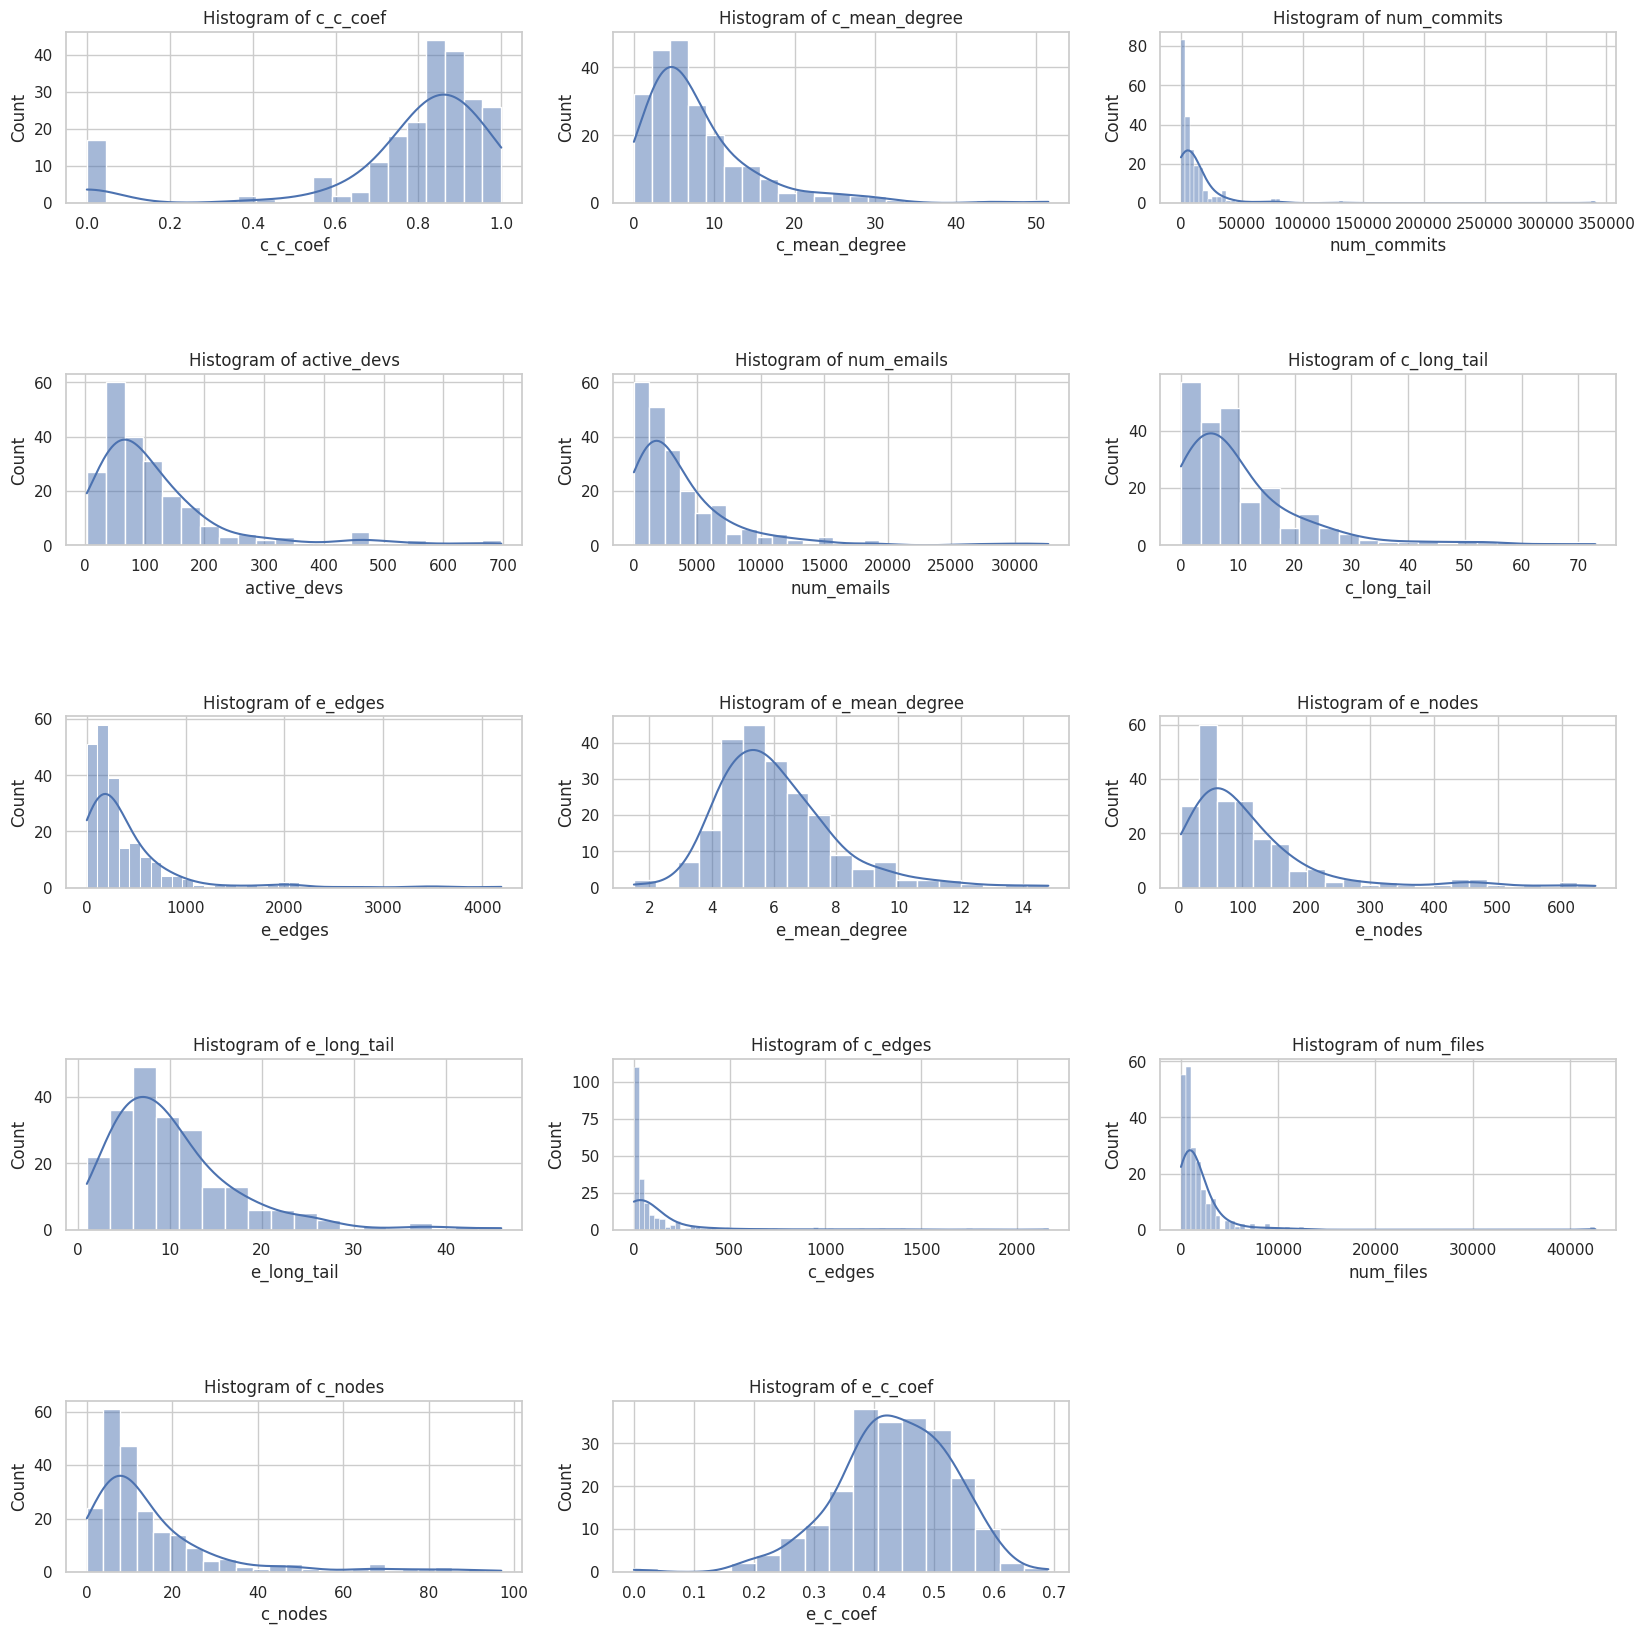

In [11]:
# Set the number of subplots (one for each feature)
num_features = len(data[features].columns)

# Calculate the number of rows and columns needed based on the number of features
num_columns = 3  # You can change this to your desired number of columns
num_rows = (num_features + num_columns - 1) // num_columns

# Create a figure and an array of subplots
fig, axes = plt.subplots(num_rows, num_columns, figsize=(20, 20))
fig.subplots_adjust(hspace=1.0)  # Adjust vertical spacing

# Iterate through each feature and create a histogram
for i, col in enumerate(data[features].columns):
    ax = axes[i // num_columns, i % num_columns]  # Select the subplot
    sns.histplot(data=df, x=col, kde=True, ax=ax)  # Create a histogram for the feature
    ax.set_title(f"Histogram of {col}")

# Remove empty subplots, if any
for i in range(num_features, num_rows * num_columns):
    fig.delaxes(axes[i // num_columns, i % num_columns])

plt.show()

# Plotting the Correlation Matrix

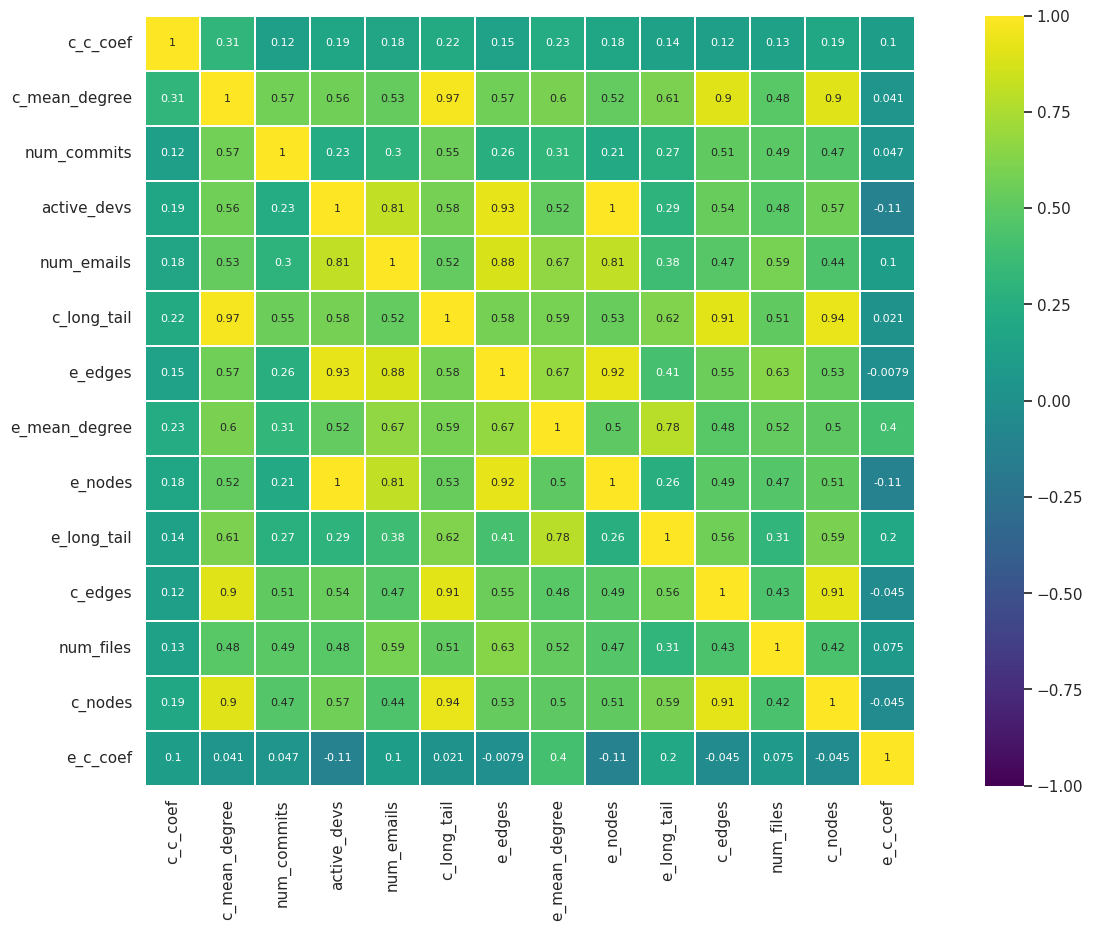

In [12]:
features = common_elements

corr = data[features].corr()
plt.figure(figsize=(18, 10))

sns.heatmap(corr[(corr >= 0.0) | (corr <= -0.0)],
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

Plotting correlation above or below 0.5

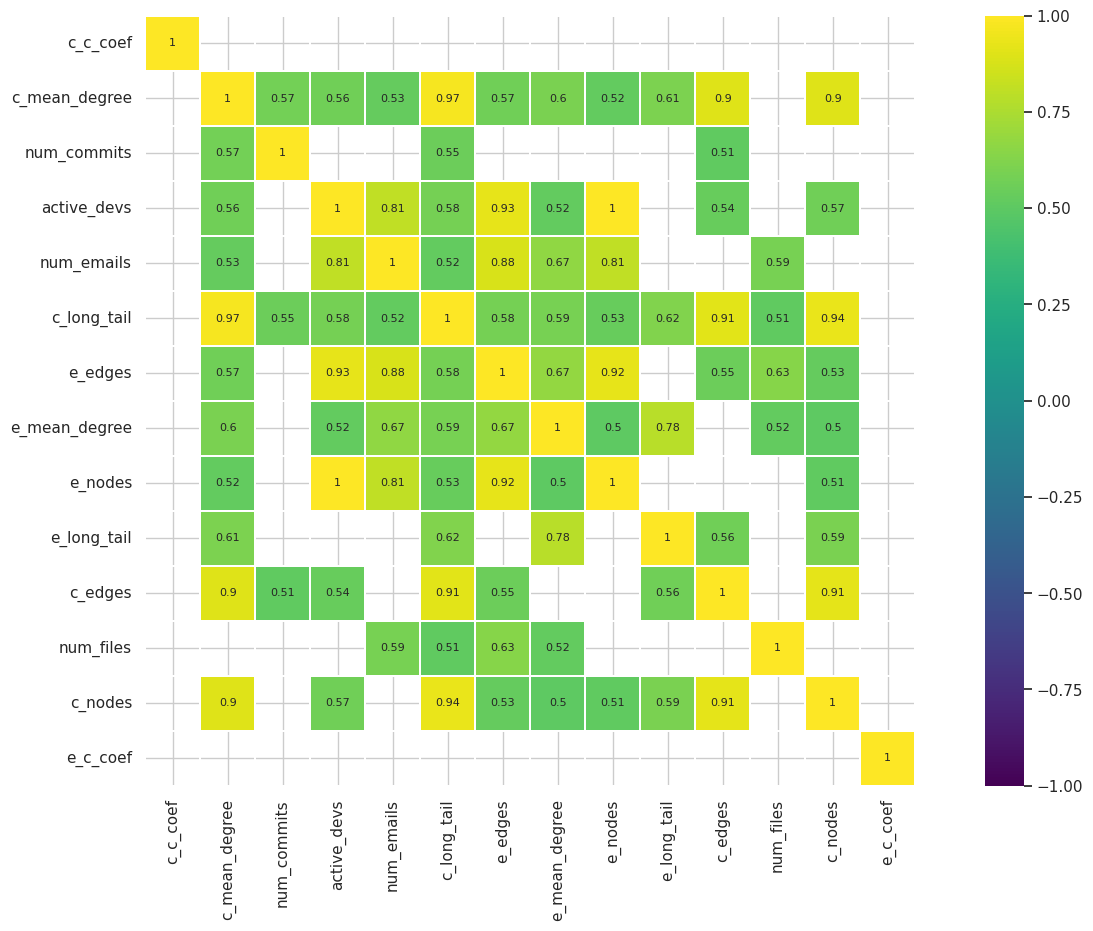

In [13]:
# Plottinf correlation above or below 0.5
corr = data[features].corr()
plt.figure(figsize=(18, 10))

sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.5)],
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

# Pair-plot

   project_id  incubation_length  active_devs  num_commits  num_committers  \
0         100          25.700000           30         3568               4   
1         101          43.166667           49         2339               5   
2         102          24.766667           69         1946               8   
3         103          53.233333           64         6451               8   
4         104          21.000000           96         6467              16   

   num_files  num_emails  num_senders  num_respondents    skew_c  ...  \
0        519         420           26               25  0.631190  ...   
1        430        1547           47               46  0.163755  ...   
2        265        4894           63               66 -0.350719  ...   
3       2084        1710           56               57  0.639066  ...   
4        888        1819           86               81 -0.732883  ...   

   c_mean_degree  c_long_tail  c_triangles  e_nodes  e_edges  e_c_coef  \
0          3.000  

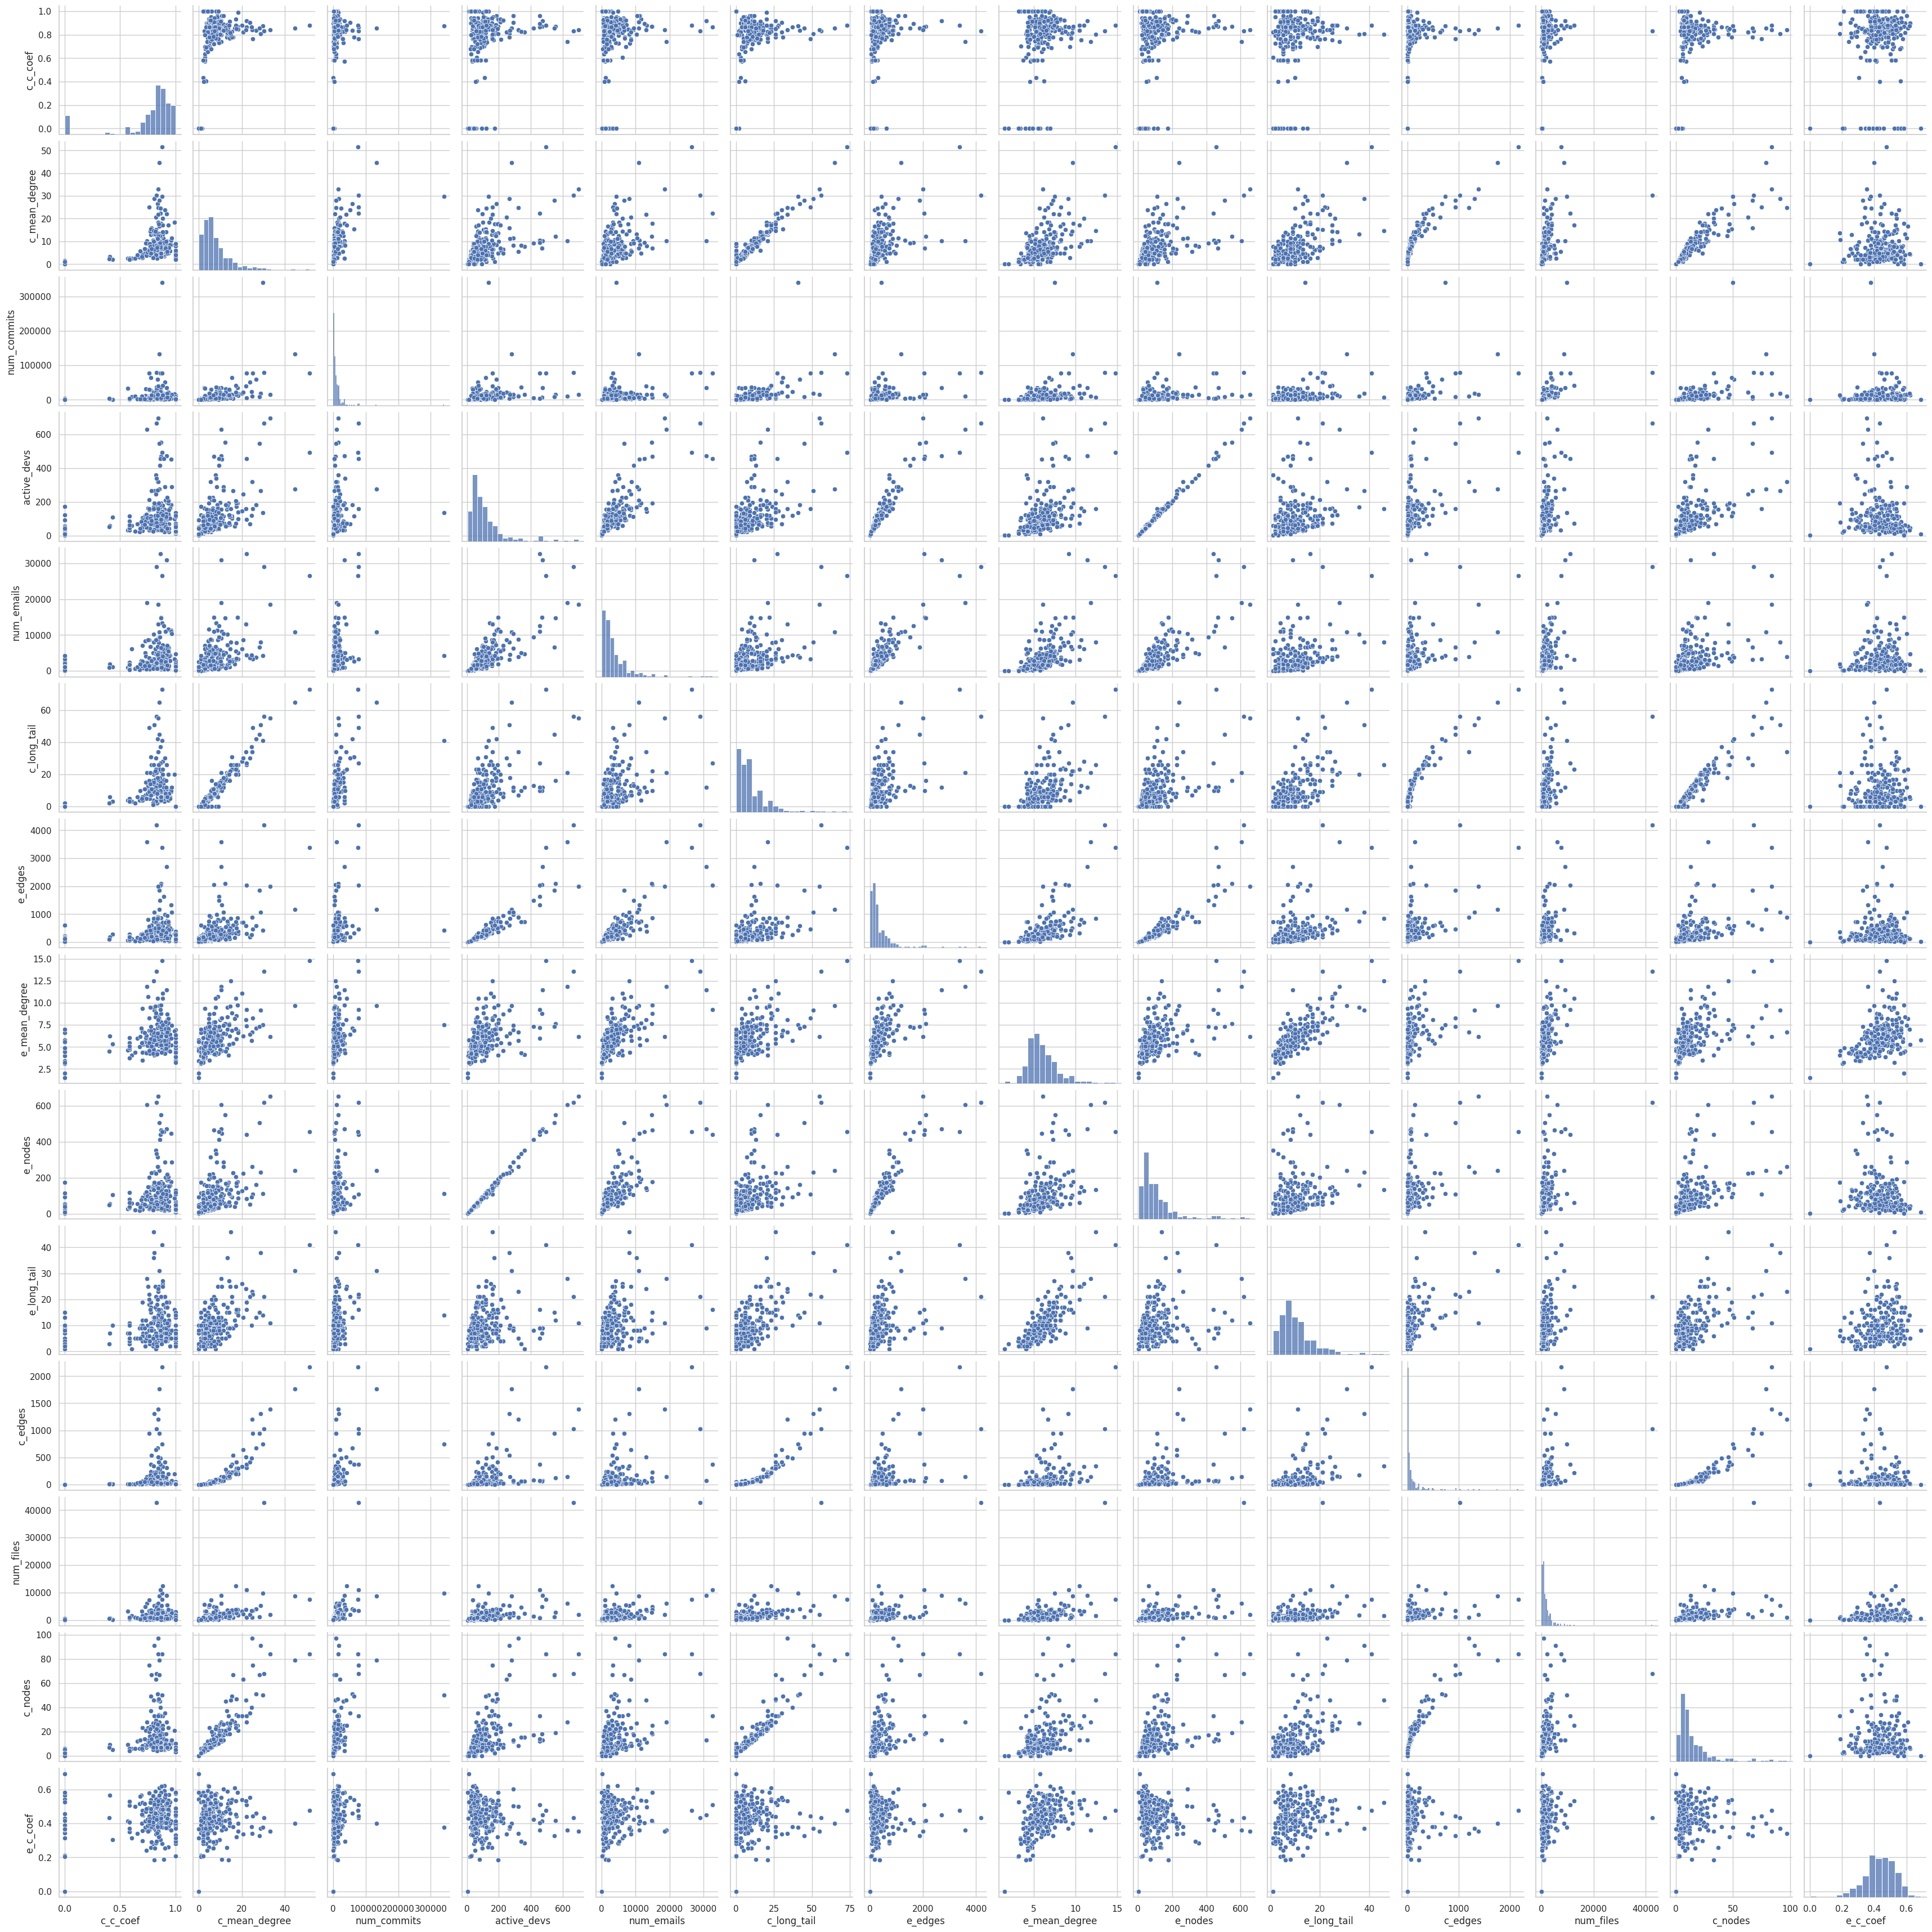

In [14]:
import seaborn as sns
data_plot_data = data[features]
sns.pairplot(data_plot_data)
print(data.head())

# Box-Plot

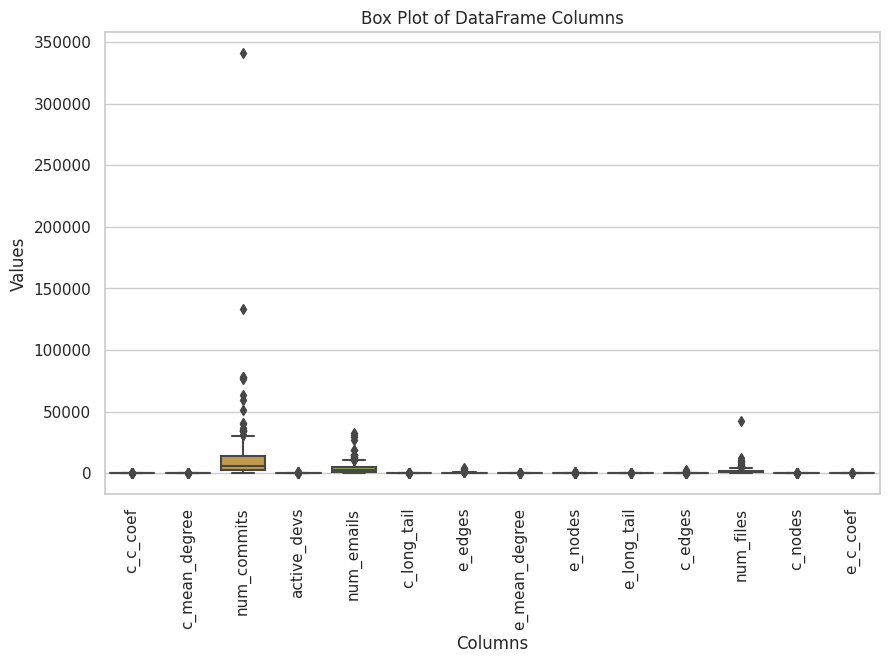

In [15]:
# Create a box plot for each column in the DataFrame
sns.set(style="whitegrid")  # Set the style of the plot

plt.figure(figsize=(10, 6))  # Set the size of the plot

# Use the boxplot function to create box plots for all columns in the DataFrame
sns.boxplot(data[features])

plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility

# Add a title and labels
plt.title("Box Plot of DataFrame Columns")
plt.xlabel("Columns")
plt.ylabel("Values")

# Show the plot
plt.show()